# Q-Learning Algoritm 
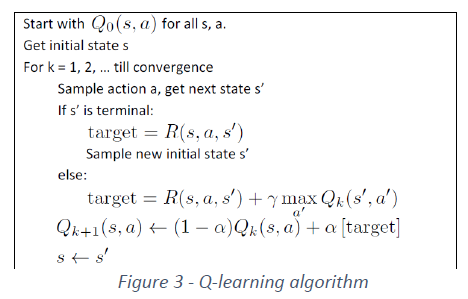

In [1]:
import gym
import numpy as np
import random
from q_learning_oop import *
from IPython.display import clear_output
from test_runner import *
import matplotlib.pyplot as plt


frozen_lake_env = gym.make("FrozenLake-v0").env

/Users/avivbh/anaconda3/envs/RL_course/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [2]:
agent = QLearningAgent(frozen_lake_env,
                      alpha=0.25,
                      gamma=0.99,
                      epsilon=1,
                      min_epsilon=0.1,
                      epsilon_decay=0.9999)

train_runner = TrainRunner(frozen_lake_env, agent)

train_runner.train(episodes=10000, steps_per_episode=100, episodes_to_snapshot_q=[500, 2000])

print("Training Done")

100%|██████████| 10000/10000 [00:06<00:00, 1531.51it/s]

Training Done


In [ ]:
episodes = 1000

tester = TestRunner(frozen_lake_env, agent)
test_results = tester.test(episodes)
        
print(f"Results after {episodes} episodes:")
print(f"good = {test_results.good}")
print(f"bad = {test_results.bad}")

In [ ]:
train_runner._q_table_snapshots

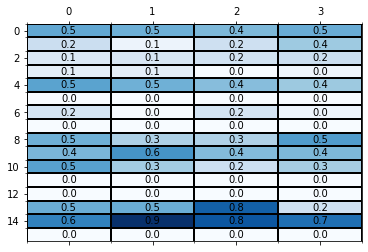

In [35]:
_, ax = plt.subplots()
ax.grid(color='black', linestyle='-', linewidth=2, which='minor')
ax.set_xticks(np.arange(-.5, 4, 1), minor=True);
ax.set_yticks(np.arange(-.5, 15, 1), minor=True);

ax.matshow(train_runner._q_table_snapshots[500], cmap=plt.cm.Blues, aspect='auto')

for (i, j), z in np.ndenumerate(train_runner._q_table_snapshots[500]):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

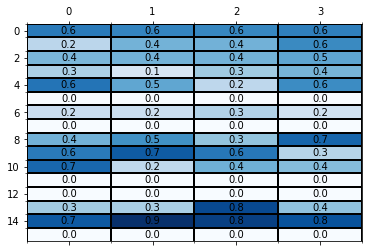

In [36]:
_, ax2 = plt.subplots()
ax2.grid(color='black', linestyle='-', linewidth=2, which='minor')
ax2.set_xticks(np.arange(-.5, 4, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 15, 1), minor=True);

ax2.matshow(train_runner._q_table_snapshots[2000], cmap=plt.cm.Blues, aspect='auto')

for (i, j), z in np.ndenumerate(train_runner._q_table_snapshots[2000]):
    ax2.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

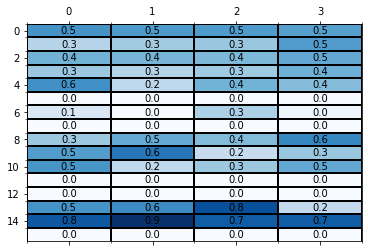

In [37]:
_, ax3 = plt.subplots()
ax3.grid(color='black', linestyle='-', linewidth=2, which='minor')
ax3.set_xticks(np.arange(-.5, 4, 1), minor=True);
ax3.set_yticks(np.arange(-.5, 15, 1), minor=True);

ax3.matshow(agent.get_q_table(), cmap=plt.cm.Blues, aspect='auto')

for (i, j), z in np.ndenumerate(agent.get_q_table()):
    ax3.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')